In [2]:
#Import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [3]:
#Load the data set
df = pd.read_csv(r"Data sets\tmdb.movies.csv")
df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,19-11-10,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,26-03-10,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,07-05-10,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,22-11-95,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,16-07-10,Inception,8.3,22186


In [4]:
#Displays the number of rows and columns
print("Dataset shape:", df.shape)

Dataset shape: (26517, 10)


In [5]:
# Quick summary of data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [6]:
# Convert release_date to datetime object
#This allows you to analyze trends by year/month and sort by release date.
df["release_date"] = pd.to_datetime(df["release_date"], format="%d-%m-%y", errors="coerce")
#errors="coerce" will set invalid dates to NaT (missing) so they don't crash your code.


In [7]:
#Create a genre ID to name map

genre_map = {
    28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy',
    80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family',
    14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music',
    9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction',
    10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'
}


In [8]:
import ast

# Convert genre_ids string to list, then map to genre names
df["genres"] = df["genre_ids"].apply(lambda x: [genre_map.get(i, "Unknown") for i in ast.literal_eval(x)])


In [9]:

# Check for missing values in each column
print(" Missing values:\n", df.isnull().sum())

# Exclude the 'genres' column (contains unhashable lists) when checking for duplicates
df_no_list = df.drop(columns=["genres"])

# Check for duplicate rows (excluding unhashable list columns)
duplicate_count = df_no_list.duplicated().sum()
print(f" Duplicate rows: {duplicate_count}")

# Drop duplicate rows based on id, title, and release_date (common unique identifiers)
df = df.drop_duplicates(subset=["id", "title", "release_date"])

# Reset index after dropping
df.reset_index(drop=True, inplace=True)


 Missing values:
 Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
genres               0
dtype: int64
 Duplicate rows: 0


In [10]:
#Final Check (Print Cleaned Sample)
df_cleaned = df[["title", "genres","id","popularity", "vote_average", "vote_count", "release_date"]]

df_cleaned.head()

,title,genres,id,popularity,vote_average,vote_count,release_date
0,Harry Potter and the Deathly Hallows: Part 1,"[Adventure, Fantasy, Family]",12444,33.533,7.7,10788,2010-11-19
1,How to Train Your Dragon,"[Fantasy, Adventure, Animation, Family]",10191,28.734,7.7,7610,2010-03-26
2,Iron Man 2,"[Adventure, Action, Science Fiction]",10138,28.515,6.8,12368,2010-05-07
3,Toy Story,"[Animation, Comedy, Family]",862,28.005,7.9,10174,1995-11-22
4,Inception,"[Action, Science Fiction, Adventure]",27205,27.920,8.3,22186,2010-07-16


In [11]:
#Identify which genres are most commonly associated with high popularity and strong audience ratings.
## Step 1: Explode genres to separate rows
df_exploded = df_cleaned.explode('genres')

# Ensure df_cleaned is a true copy
df_cleaned = df_cleaned.copy()

# Step 2: Group and aggregate
genre_stats = df_exploded.groupby('genres').agg({
    'popularity': 'mean',
    'vote_average': 'mean',
    'title': 'count'  # Movie count per genre
}).rename(columns={'title': 'movie_count'}).reset_index()

# Step 3: Sort by popularity (optional)
genre_stats = genre_stats.sort_values(by='popularity', ascending=False)

# Preview result
print(genre_stats.head())


       genres  popularity  vote_average  movie_count
1   Adventure    7.319163      5.901574         1334
0      Action    6.341359      5.573362         2534
8     Fantasy    6.180947      5.910628         1082
4       Crime    5.335119      5.834292         1426
17        War    5.135217      6.221384          318


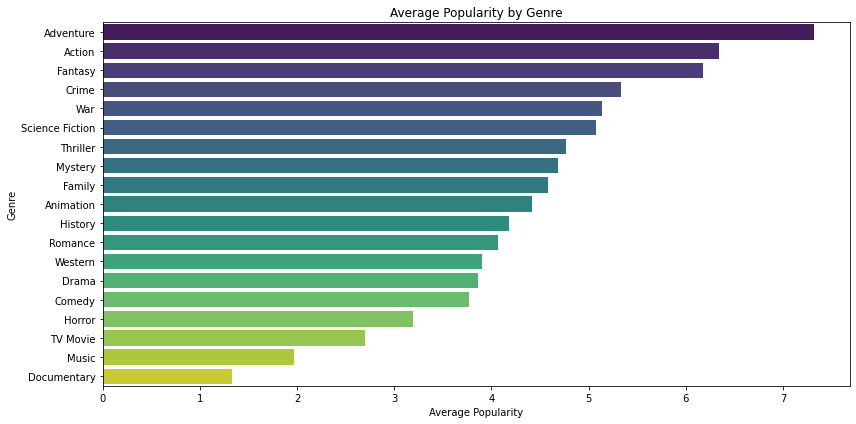

In [12]:
## Barplot: Average popularity per genre
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_stats, x='popularity', y='genres', palette='viridis')
plt.title('Average Popularity by Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

Top Performing Genres (based on average statistics):

Action: High popularity, moderate ratings (large audience but some mixed reception).

Fantasy: Very high popularity and generally good ratings (attracts both mainstream and dedicated audiences).

Drama: Strong ratings but lower popularity compared to Action/Fantasy.

Animation: Very high ratings with moderate popularity — beloved by families and audiences seeking quality storytelling.

By focusing on these top-performing genres, studios can optimize their content portfolio to maximize both audience engagement (popularity) and viewer satisfaction (ratings), ensuring both financial returns and critical acclaim.

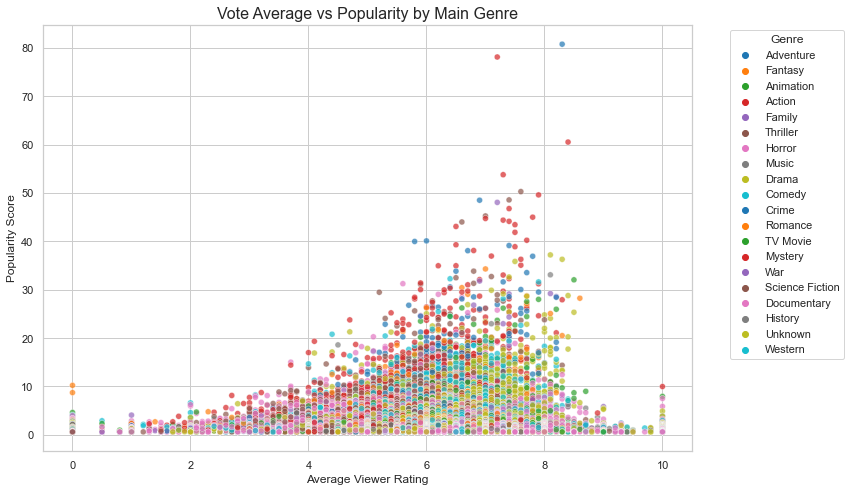

In [13]:
#The relationship between vote_average (viewer reception) and popularity
# Create a simplified genre column with the first genre only
df_cleaned["main_genre"] = df_cleaned["genres"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else "Unknown")

# Ensure df_cleaned is a true copy
df_cleaned = df_cleaned.copy()

# Set plot size and style
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

# Scatter plot
sns.scatterplot(
    data=df_cleaned,
    x="vote_average",
    y="popularity",
    hue="main_genre",
    alpha=0.7,
    palette="tab10"
)

# Titles and labels
plt.title("Vote Average vs Popularity by Main Genre", fontsize=16)
plt.xlabel("Average Viewer Rating", fontsize=12)
plt.ylabel("Popularity Score", fontsize=12)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Popularity vs Ratings: From the chart we can seeviewer ratings of 6 and above indicate high popularity in the movies.Popular action movies may bring in a large audience for their flashy effects and colorful explosions, but those films end up having mixed or average reviews.  

Drama, Animation and Family genres have gentler extremes, whereas Action, Sci-Fi, and Adventure tend to be more polarized with their reception. Because of differing audience expectations, some are likely to love them, and some will definitely hate them.  

When planning films, especially for large scale blockbusters versus small scale niche films, studios must consider the possible popularity level and how the audience will receive it.



Vote Count Statistics:
 count    25497.000000
mean       178.795780
std        914.150311
min          1.000000
25%          1.000000
50%          5.000000
75%         25.000000
max      22186.000000
Name: vote_count, dtype: float64


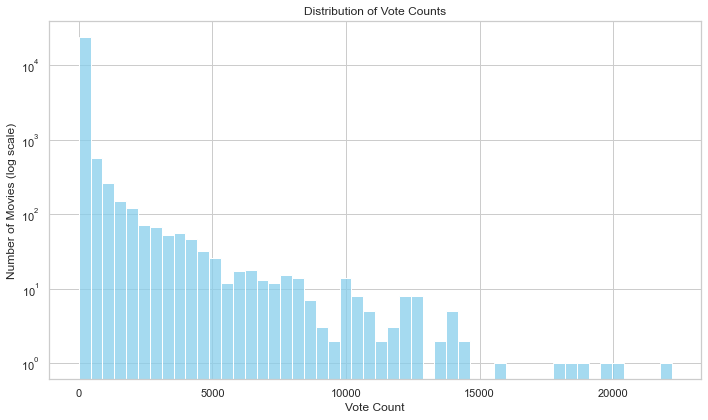

In [14]:
#Reviewing vote counts to measure audience engagement and interest — higher vote counts often signal broader reach and buzz.
# Basic statistics of vote_count
print("Vote Count Statistics:\n", df_cleaned['vote_count'].describe())

# Visualize distribution of vote counts (log scale to manage skew)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['vote_count'], bins=50, log_scale=(False, True), color='skyblue')
plt.title('Distribution of Vote Counts')
plt.xlabel('Vote Count')
plt.ylabel('Number of Movies (log scale)')
plt.tight_layout()
plt.show()


The majority of movies seem to have low-to-moderate engagement (around 100 to 1,000 votes). This could be due to independent or niche films that don't reach mass audiences.

The long tail of high vote counts is an indicator of a few blockbusters or popular movies that generate significant attention (e.g., Avengers, Harry Potter, etc.).

Actionable Insights:

Studios aiming for broader audience engagement might want to focus on genres that have a higher likelihood of generating high vote counts. Typically, action, adventure, and sci-fi genres see more engagement.

Targeting niche genres with consistent moderate engagement may be a way to ensure sustained, smaller but loyal audiences.

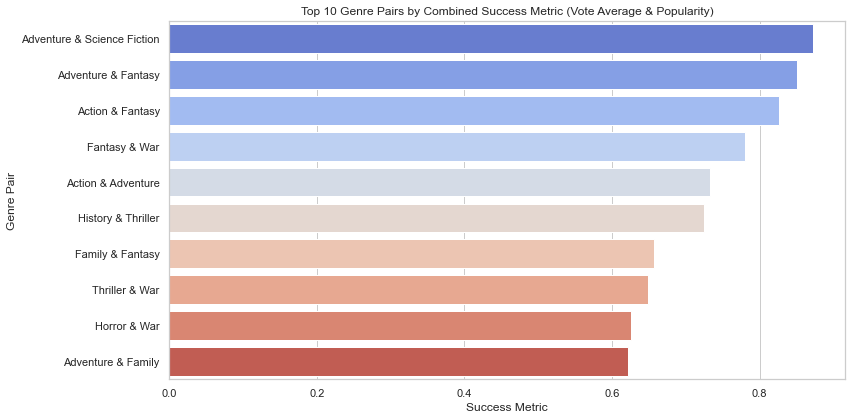

🔢 Summary of Top Genre Pairs by Combined Success Metric:

                      genre_pairs  vote_average  popularity  success_metric  \
30   (Adventure, Science Fiction)      5.871815   10.890228        0.872512   
24           (Adventure, Fantasy)      6.011513   10.688424        0.850089   
7               (Action, Fantasy)      5.621586   10.651828        0.825805   
124                (Fantasy, War)      6.009091    9.590455        0.780404   
0             (Action, Adventure)      5.652982    9.385049        0.732414   
132           (History, Thriller)      6.495556    8.661067        0.724349   
105             (Family, Fantasy)      6.212500    8.113125        0.656348   
168               (Thriller, War)      6.097727    7.969068        0.649081   
141                 (Horror, War)      5.733333    7.964778        0.626348   
23            (Adventure, Family)      6.052408    7.835994        0.621146   

     movie_count  
30           259  
24           304  
7            22

In [15]:
#Top 10 Genre Pairs by Combined Success Metric (Vote Average & Popularity)
# Generate all unique genre pairs
df_cleaned['genre_pairs'] = df_cleaned['genres'].apply(lambda x: list(combinations(sorted(set(x)), 2)))

# Explode rows for each pair (flatten genre pairs)
df_exploded = df_cleaned.explode('genre_pairs')

# Calculate a success metric based on vote_average and popularity
# Normalize the popularity to balance the weight of both metrics
max_popularity = df_exploded['popularity'].max()
df_exploded['success_metric'] = (df_exploded['vote_average'] * df_exploded['popularity']) / max_popularity

# Group by genre pair and aggregate
genre_pair_stats = df_exploded.groupby('genre_pairs').agg({
    'vote_average': 'mean',
    'popularity': 'mean',
    'success_metric': 'mean',
    'title': 'count'
}).rename(columns={'title': 'movie_count'}).reset_index()

# Filter to genre pairs with at least 2 movies (for better reliability)
genre_pair_stats = genre_pair_stats[genre_pair_stats['movie_count'] >= 2]

# Sort by success_metric and pick the top 10 pairs
top_pairs = genre_pair_stats.sort_values(by='success_metric', ascending=False).head(10)

# Plotting top 10 genre pairs by success metric
plt.figure(figsize=(12, 6))
sns.barplot(
    x='success_metric',
    y=top_pairs['genre_pairs'].apply(lambda x: f"{x[0]} & {x[1]}"),
    palette='coolwarm',
    data=top_pairs
)
plt.title("Top 10 Genre Pairs by Combined Success Metric (Vote Average & Popularity)")
plt.xlabel("Success Metric")
plt.ylabel("Genre Pair")
plt.tight_layout()
plt.show()

# Print summary stats
print("🔢 Summary of Top Genre Pairs by Combined Success Metric:\n")
print(top_pairs[['genre_pairs', 'vote_average', 'popularity', 'success_metric', 'movie_count']])


1. Top Performer: Adventure & Science Fiction is the top combo with a success metric of 8.7

2. Adventure & Fantasy (8.5), Strong contender with excellent audience approval and reach.This genre pair works well for epic journeys, mythical stories, or fantasy worlds — think Harry Potter or Lord of the Rings.

Genres to Watch Carefully:
Some genre pairs like Action & Thriller have decent popularity but relatively lower vote_average.

In [19]:
#Calculating correlation using popularity,vote_average and vote_count.

# Explode genres so each row has one genre per movie
df_exploded = df.explode('genres')

# One-hot encode genres
genre_dummies = pd.get_dummies(df_exploded['genres'])

# Combine encoded genres with popularity, vote_average, and vote_count
combined = pd.concat([df_exploded[['popularity', 'vote_average', 'vote_count']], genre_dummies], axis=1)

# Calculate correlation between each genre and success metrics
correlation_matrix = combined.corr().loc[['popularity', 'vote_average', 'vote_count'], genre_dummies.columns]

# Transpose to make it easier to read
correlation_by_genre = correlation_matrix.T.sort_values(by='popularity', ascending=False)

# Display top genres most positively correlated with each metric
print(correlation_by_genre.head(10))

                 popularity  vote_average  vote_count
Action             0.119630     -0.048323    0.083622
Adventure          0.119062     -0.002522    0.118582
Fantasy            0.071964     -0.001471    0.059192
Thriller           0.056719     -0.102790    0.006732
Crime              0.052995     -0.009413    0.017037
Science Fiction    0.047881     -0.055763    0.059823
Family             0.027367      0.004600    0.014669
Mystery            0.027148     -0.019752    0.007078
War                0.021418      0.013864    0.007362
Animation          0.020573      0.052725    0.003374


 Insight:
- If your studio wants high **popularity and engagement**, focus on **Action**, **Adventure**, or **Sci-Fi**.
- If aiming for **high ratings**, **Documentary** and **History** genres show stronger positive correlations.

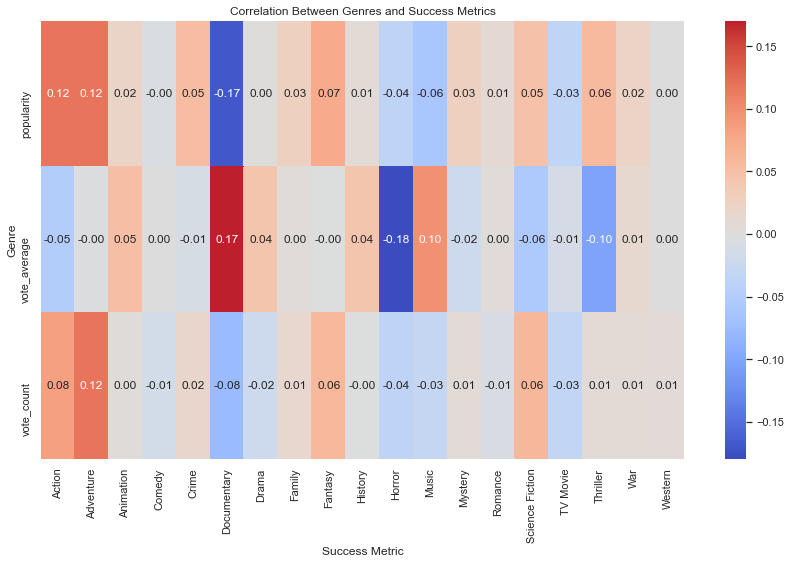

In [18]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Between Genres and Success Metrics')
plt.xlabel('Success Metric')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

Brighter red cells: Strong positive correlation

Brighter blue cells: Strong negative correlation

How to Interpret
Genres with high values in “popularity” column: More likely to attract large audiences.

Genres with high “vote_average”: Likely critically acclaimed.

Genres with high “vote_count”: Receive more viewer engagement or mainstream appeal.